# Sleep Disorder Prediction

### Problem Statement

The aim of the project is to analyze the person's lifestyles and medical variables such as age, BMI, physical activity, sleep duration, blood pressure and many more, to predict the sleep disorder and its type.

<img src = https://ananda.ai/wp-content/uploads/2022/08/common-sleep-disorders-1024x576.png>

### About the Dataset
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

### Key Features of the Dataset:
- Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
- Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
- Cardiovascular Health: Examine blood pressure and heart rate measurements.
- Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

### Data Dictionary
| Column Name | Description |
| --- | --- |
|Person_ID | Unique ID assigned to each person |
|Gender|The gender of the person (Male/Female)|
|Age | Age of the person in years |
|Occupation | The occupation of the person |
|Sleep_duration | The duration of sleep of the person in hours |
|Quality_of_sleep | A subjective rating of the quality of sleep, ranging from 1 to 10|
|Physical_activity | The level of physical activity of the person (Low/Medium/High) |
|Stress Level| A subjective rating of the stress level, ranging from 1 to 10 |
|BMI_category | The BMI category of the person (Underweight/Normal/Overweight/Obesity) |
|Blood_pressure | The blood pressure of the person in mmHg |
|Heart_rate | The heart rate of the person in beats per minute |
|Daily Steps | The number of steps taken by the person per day |
|Sleep_disorder | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea) |


### Details about Sleep Disorder Column:
- None: The individual does not exhibit any specific sleep disorder.
- Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

<h2 style="color:blue" align="left"> 1. Import necessary Libraries </h2>

In [1]:
# Read Data
import numpy as np                     # For doing Numerical caluculation like mean, std, mode etc.,
import pandas as pd                    # for loading, reading and manipulation the data

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

<h2 style="color:blue" align="left"> 2. Loading dataset </h2>

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
print(f'First 5 rows \n\n{df.head()}')

First 5 rows 

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None  
1         125/80   

In [3]:
# checking dimension (num of rows and columns) of dataset
print("data shape (Rows, Columns):",df.shape)

data shape (Rows, Columns): (374, 13)


In [4]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


<h2 style="color:blue" align="left"> 3. EDA (Exploratory Data Analysis) </h2>

- EDA is a way of **Visualizing, Summarizing and interpreting** the information that is **hidden in rows and column** format.

<b> Find Unwanted Columns </b>

Currently there are no any unwanted columns in the dataset

<b> Find Missing Values </b>

In [6]:
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

No missing values in the dataset

##### Splitting the blood pressure into systolic and diastolic

In [7]:
#spliting the blood pressure into two columns
df['systolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['diastolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])
#droping the blood pressure column
df.drop('Blood Pressure', axis=1, inplace=True)

In [8]:
df['systolic_bp'] = pd.to_numeric(df['systolic_bp'])
df['diastolic_bp'] = pd.to_numeric(df['diastolic_bp'])

##### Converting the `Normal weight` to `weight`

In [9]:
#replacing normal weight with normal in BMI column
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [10]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


<b> Explore categorical Features </b>

In [11]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
categorical_features

['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

<b> Checking for unique values in Categorical_features </b>

In [12]:
print(df['Gender'].unique())
print(df['Occupation'].unique())
print(df['BMI Category'].unique())
print(df['Sleep Disorder'].unique())

['Male' 'Female']
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
['Overweight' 'Normal' 'Obese']
['None' 'Sleep Apnea' 'Insomnia']


In [13]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
numerical_features

['Person ID',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'systolic_bp',
 'diastolic_bp']

<b> Find Outliers in numerical features </b>

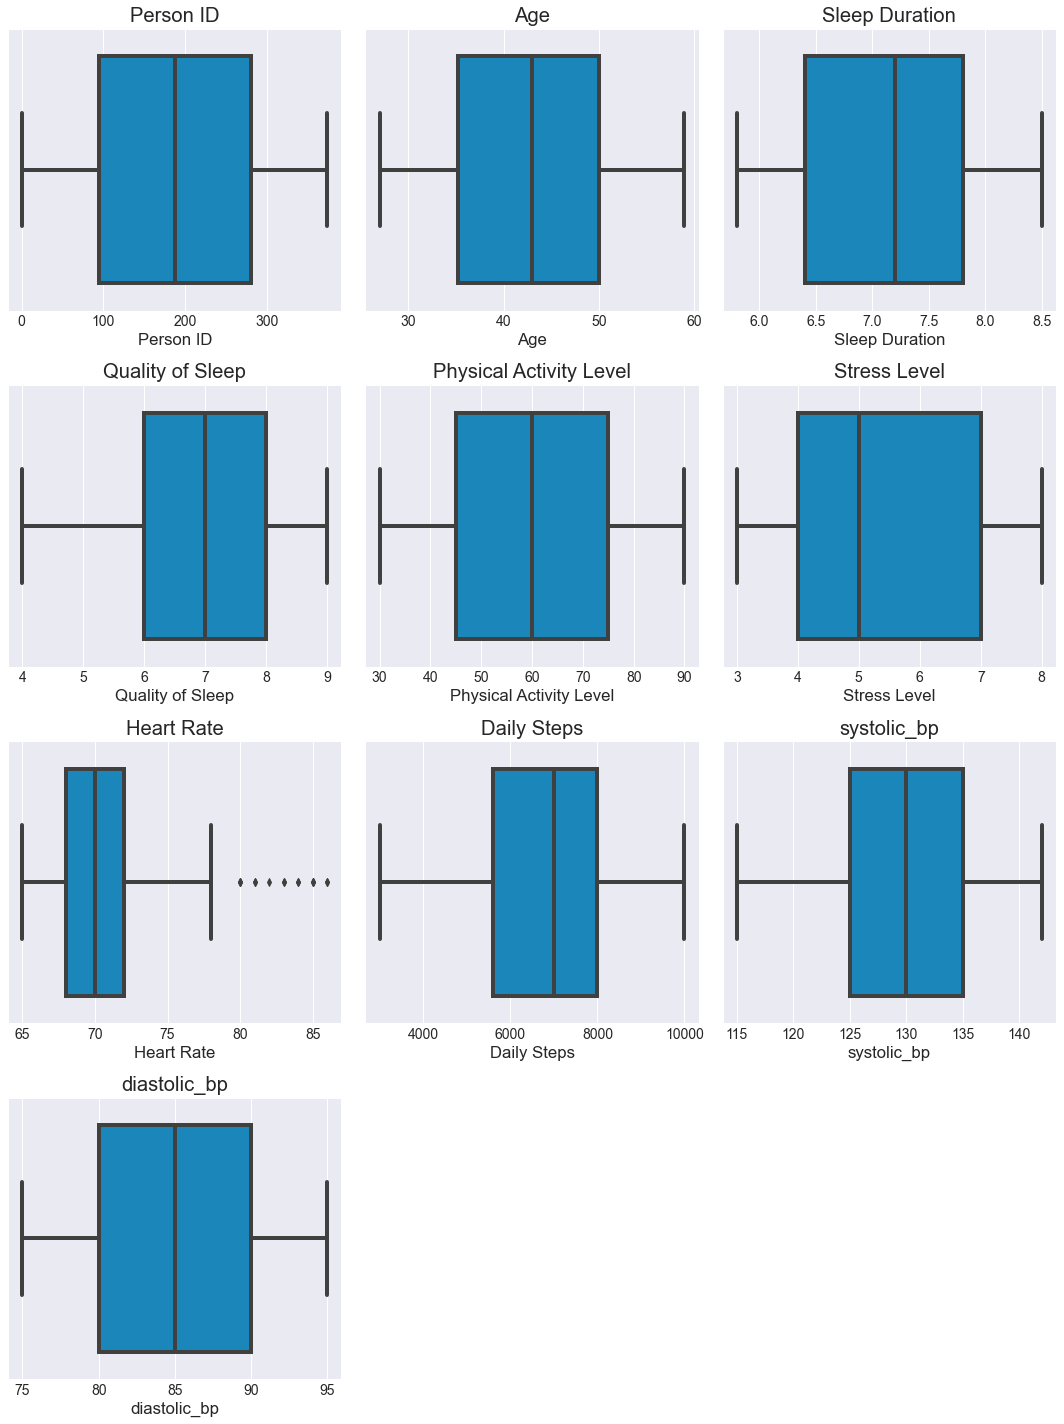

In [14]:
# Get the names of all columns with data type 'int'
num_vars = [feature for feature in numerical_features]

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

<h2 style="color:blue" align="left"> 4. Descriptive Statistics  </h2>

In [15]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,systolic_bp,diastolic_bp
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [16]:
df.describe(include='all')

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
count,374.000000,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374.000000,374.000000,374,374.000000,374.000000
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,3,NaN,NaN,3,NaN,NaN
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,NaN,NaN,None,NaN,NaN
freq,NaN,189,NaN,73,NaN,NaN,NaN,NaN,216,NaN,NaN,219,NaN,NaN
mean,187.500000,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,70.165775,6816.844920,NaN,128.553476,84.649733
std,108.108742,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,4.135676,1617.915679,NaN,7.748118,6.161611
min,1.000000,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,65.000000,3000.000000,NaN,115.000000,75.000000
25%,94.250000,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,68.000000,5600.000000,NaN,125.000000,80.000000
50%,187.500000,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,70.000000,7000.000000,NaN,130.000000,85.000000
75%,280.750000,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,72.000000,8000.000000,NaN,135.000000,90.000000


<h2 style="color:blue" align="left"> 5. Data Visualization </h2>

### 1. Univariate Analysis

- Univariate Analysis : data consists of **only one variable (only x value)**.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  systolic_bp              374 non-null    int64  
 13  diastolic_bp             374 non-null    int64  
dtypes: float64(1), int64(9), o

### Gender

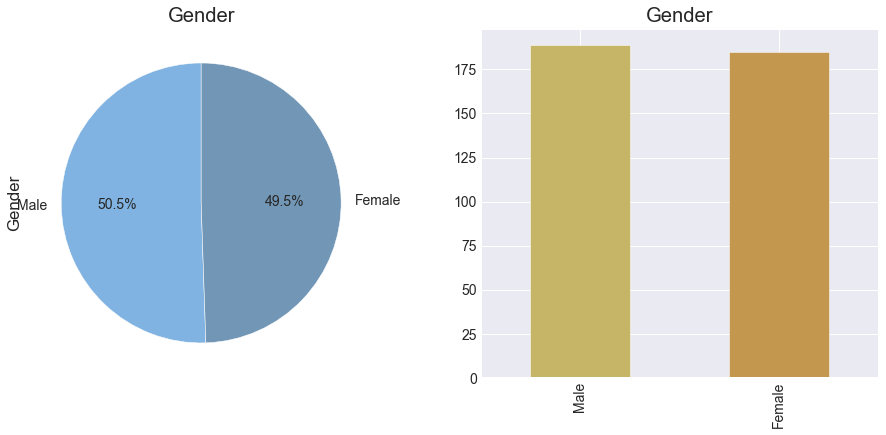

In [18]:
f,ax = plt.subplots(1,2,figsize=(14,6))

df['Gender'].value_counts().plot(kind='pie',autopct='%4.1f%%',colors = ['#80B3E1', '#7296B6', '#3D85C6'], startangle=90,ax=ax[0])
ax[0].set_title('Gender')

df['Gender'].value_counts().plot.bar(color=['#C6B566', '#C4974F', '#101820'], ax=ax[1])
ax[1].set_title('Gender')

plt.show()

## Age

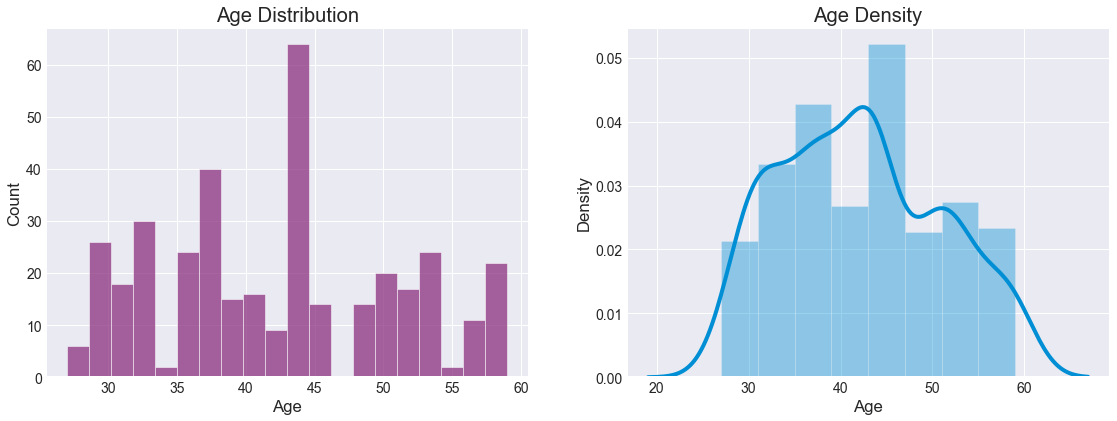

In [19]:
f,ax = plt.subplots(1,2, figsize=(17,6))

sns.histplot(df['Age'],bins=20,kde=False,color='#8A307F',ax=ax[0])
ax[0].set_title('Age Distribution')

sns.distplot(df['Age'],kde=True,ax=ax[1])
ax[1].set_title('Age Density')

plt.show()

### Occupation

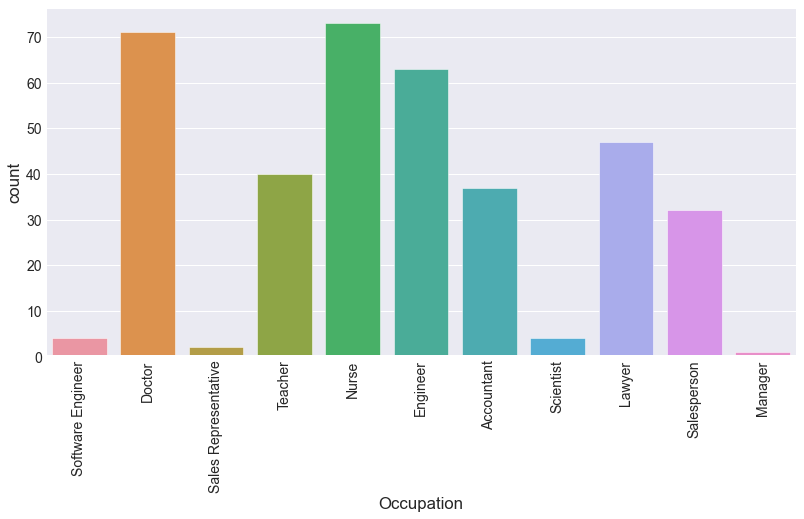

In [20]:
f,ax = plt.subplots(1,figsize=(12,6))

sns.countplot(x='Occupation', data=df)
plt.xticks(rotation=90)

plt.show()

### Sleep Duration

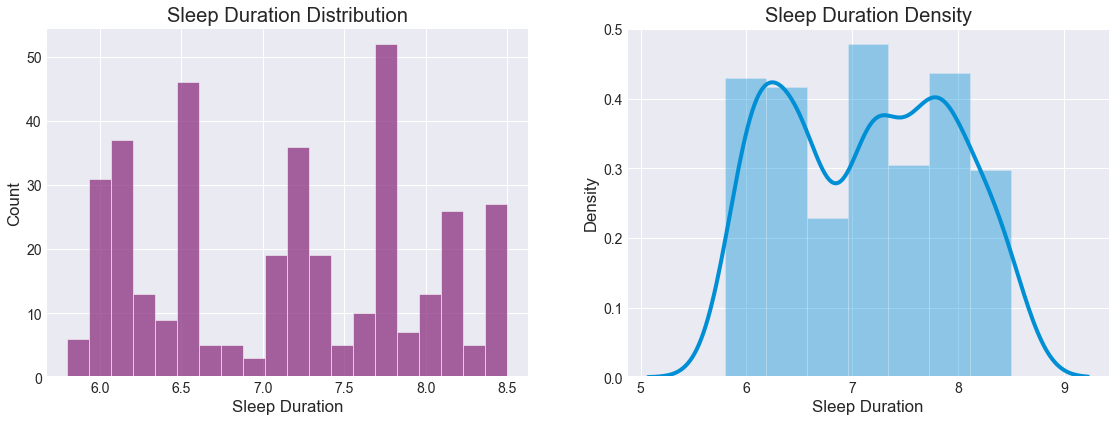

In [21]:
f,ax = plt.subplots(1,2, figsize=(17,6))

sns.histplot(df['Sleep Duration'],bins=20,kde=False,color='#8A307F',ax=ax[0])
ax[0].set_title('Sleep Duration Distribution')

sns.distplot(df['Sleep Duration'],kde=True,ax=ax[1])
ax[1].set_title('Sleep Duration Density')

plt.show()

### Quality of Sleep

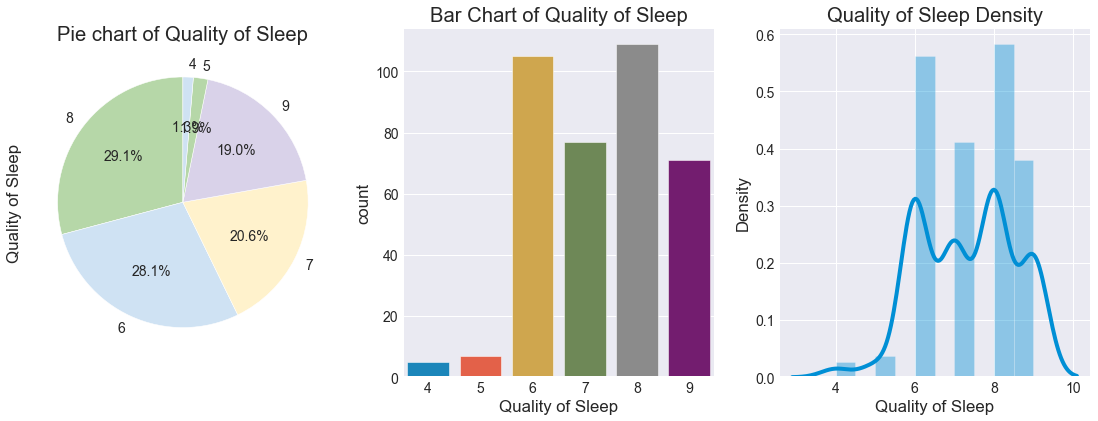

In [22]:
f,ax = plt.subplots(1,3, figsize=(17,6))

df['Quality of Sleep'].value_counts().plot(kind='pie',autopct='%4.1f%%',
                                           colors = ['#b6d7a8','#cfe2f3','#fff2cc','#d9d2e9'], startangle=90,ax=ax[0])
ax[0].set_title('Pie chart of Quality of Sleep')

sns.countplot(x=df['Quality of Sleep'] , ax=ax[1])
ax[1].set_title('Bar Chart of Quality of Sleep')

sns.distplot(df['Quality of Sleep'],kde=True,ax=ax[2])
ax[2].set_title('Quality of Sleep Density')

plt.show()

### Physical Activity Level

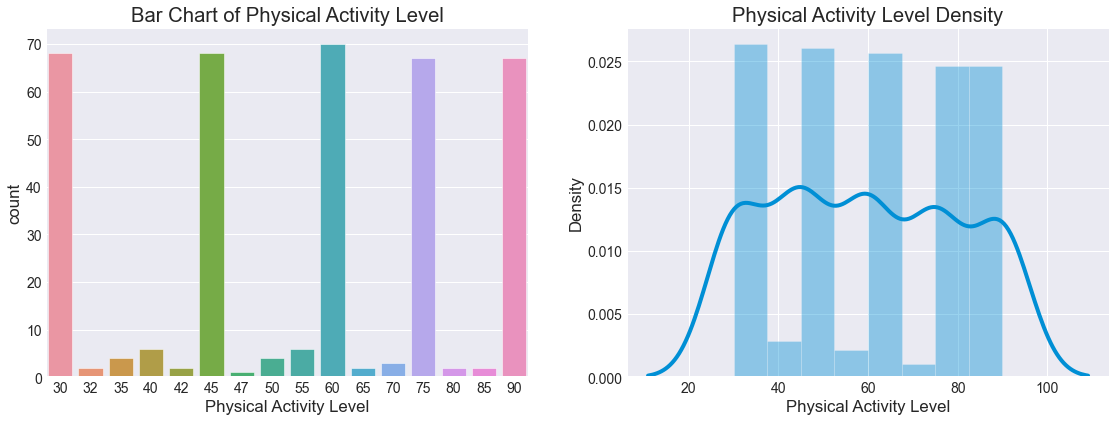

In [23]:
f,ax = plt.subplots(1,2, figsize=(17,6))

sns.countplot(x=df['Physical Activity Level'] , ax=ax[0])
ax[0].set_title('Bar Chart of Physical Activity Level')

sns.distplot(df['Physical Activity Level'],kde=True,ax=ax[1])
ax[1].set_title('Physical Activity Level Density')

plt.show()

### Stress Level

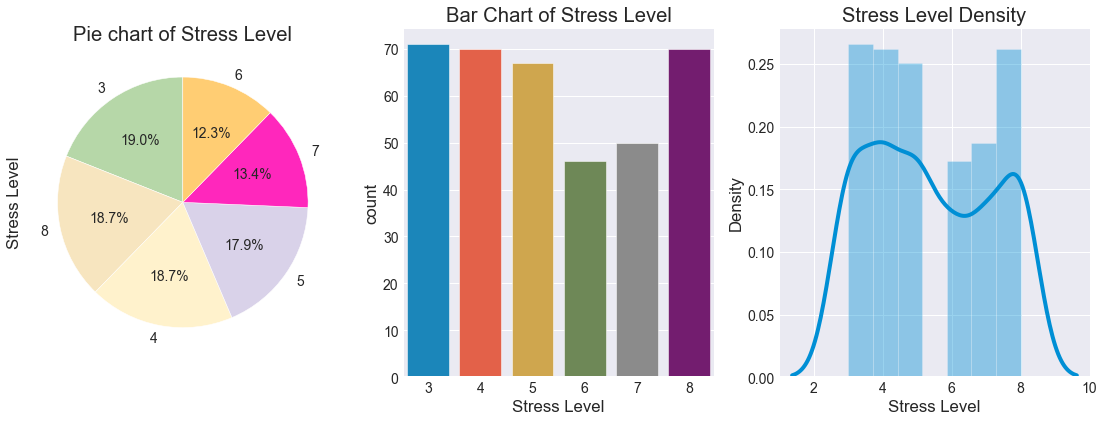

In [24]:
f,ax = plt.subplots(1,3, figsize=(17,6))

df['Stress Level'].value_counts().plot(kind='pie',autopct='%4.1f%%',
                                           colors = ['#b6d7a8','#f7e5bf','#fff2cc','#d9d2e9','#ff27bc','#ffcd73'], startangle=90,ax=ax[0])
ax[0].set_title('Pie chart of Stress Level')

sns.countplot(x=df['Stress Level'] , ax=ax[1])
ax[1].set_title('Bar Chart of Stress Level')

sns.distplot(df['Stress Level'],kde=True,ax=ax[2])
ax[2].set_title('Stress Level Density')

plt.show()

### BMI Category

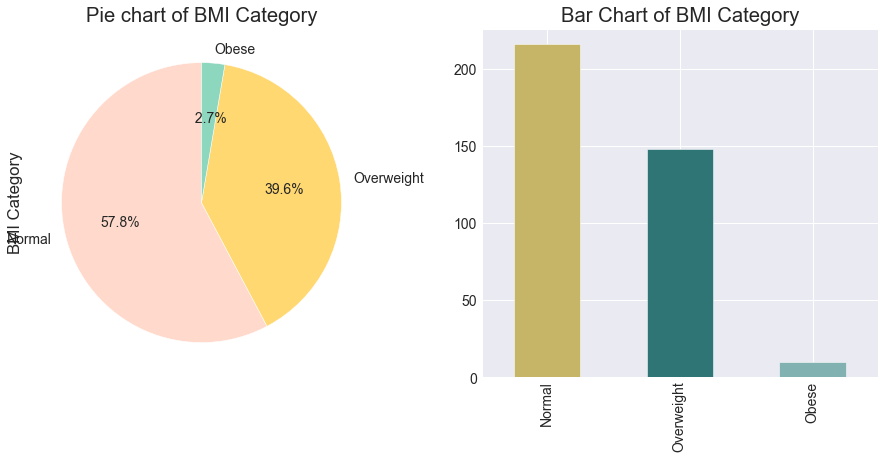

In [25]:
f,ax = plt.subplots(1,2,figsize=(14,6))

df['BMI Category'].value_counts().plot(kind='pie',autopct='%4.1f%%',colors = ['#ffdacc','#ffd872','#8dd7bf','#ffbf65'], startangle=90,ax=ax[0])
ax[0].set_title('Pie chart of BMI Category')

df['BMI Category'].value_counts().plot.bar(color=['#C6B566', '#2F7576', '#81B2B1'], ax=ax[1])
ax[1].set_title('Bar Chart of BMI Category')

plt.show()

### Heart Rate

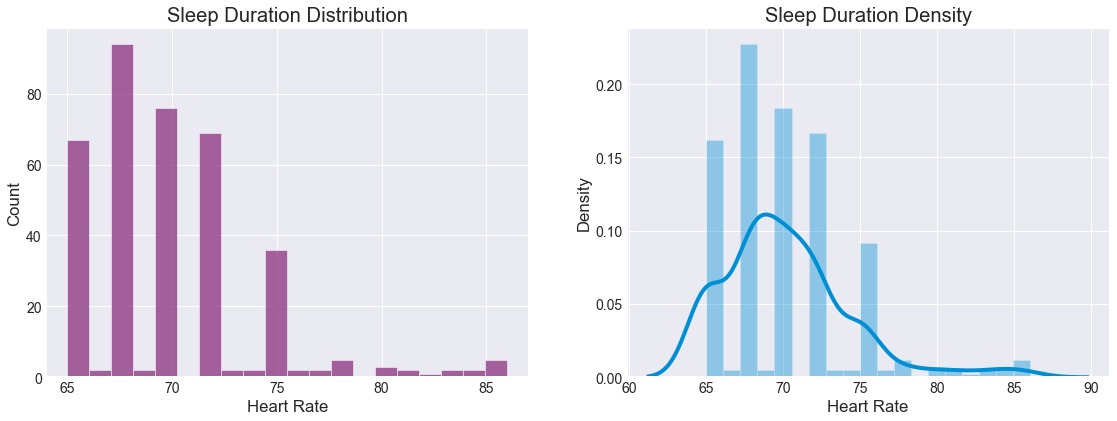

In [26]:
f,ax = plt.subplots(1,2, figsize=(17,6))

sns.histplot(df['Heart Rate'],bins=20,kde=False,color='#8A307F',ax=ax[0])
ax[0].set_title('Sleep Duration Distribution')

sns.distplot(df['Heart Rate'],kde=True,ax=ax[1])
ax[1].set_title('Sleep Duration Density')

plt.show()

### Daily Steps

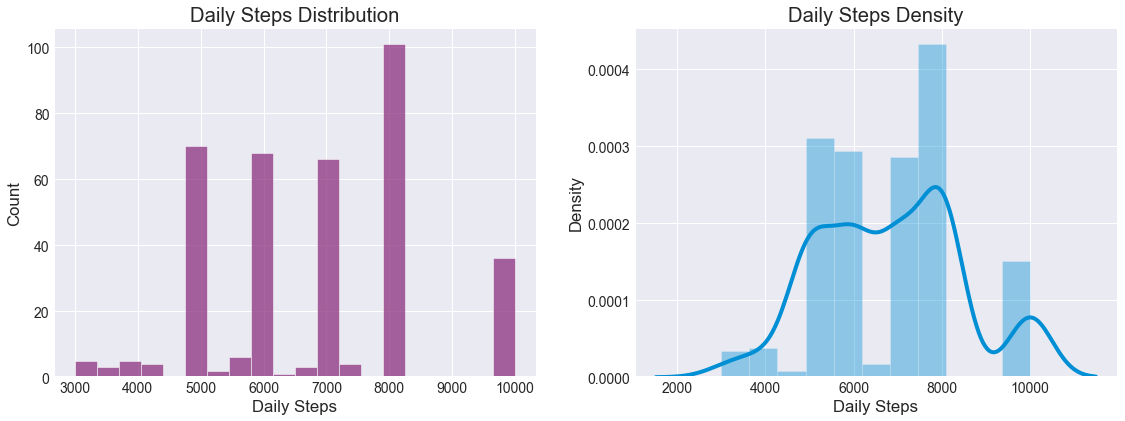

In [27]:
f,ax = plt.subplots(1,2, figsize=(17,6))

sns.histplot(df['Daily Steps'],bins=20,kde=False,color='#8A307F',ax=ax[0])
ax[0].set_title('Daily Steps Distribution')

sns.distplot(df['Daily Steps'],kde=True,ax=ax[1])
ax[1].set_title('Daily Steps Density')

plt.show()

### Sleep Disorder

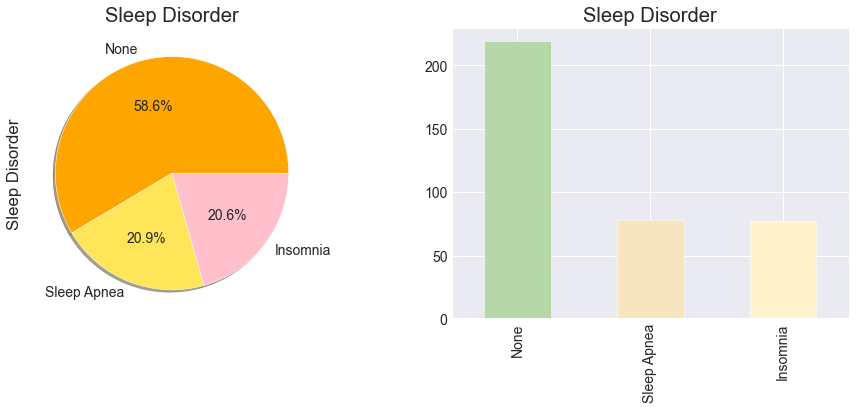

In [28]:
f,ax = plt.subplots(1,2,figsize=(14,5))

df['Sleep Disorder'].value_counts().plot.pie(autopct='%4.1f%%', shadow = True, colors = ['orange', '#ffe659','pink'],ax=ax[0])
ax[0].set_title('Sleep Disorder')

df['Sleep Disorder'].value_counts().plot.bar(color=['#b6d7a8','#f7e5bf','#fff2cc'], ax=ax[1])
ax[1].set_title('Sleep Disorder')

plt.show()

### 2. Bivariate Analysis

- **Bivariate Analysis** : data involves **two different variables**.

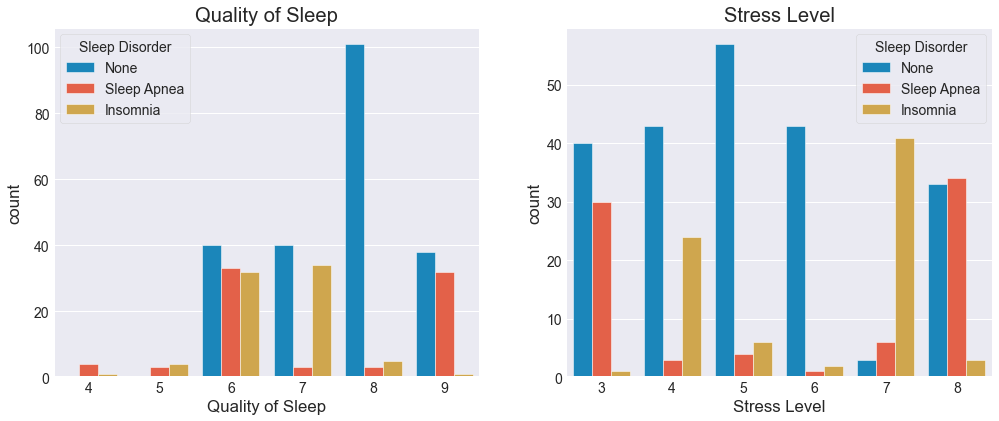

In [29]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.countplot(x = 'Quality of Sleep', data = df, ax=ax[0], hue = 'Sleep Disorder').set_title('Quality of Sleep')
sns.countplot(x = 'Stress Level', data = df, ax=ax[1], hue = 'Sleep Disorder').set_title('Stress Level')

plt.show()

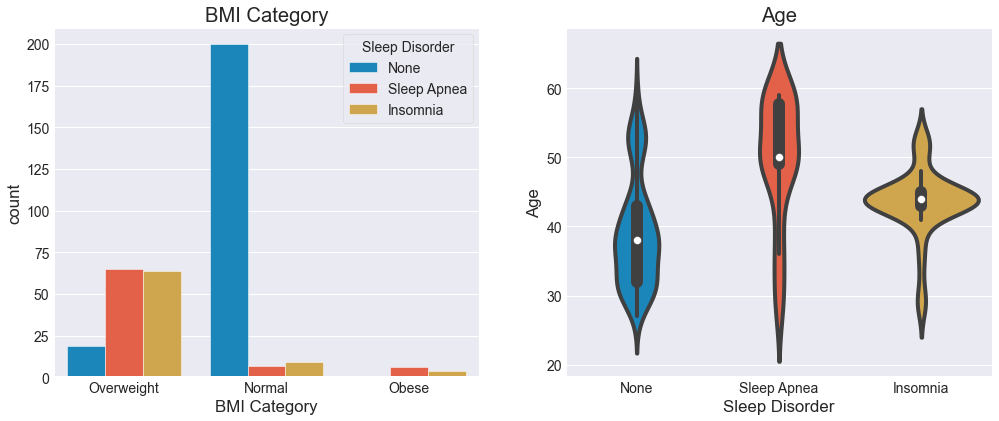

In [30]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.countplot(x = 'BMI Category', data = df, ax=ax[0],hue = 'Sleep Disorder').set_title('BMI Category')
sns.violinplot(x = 'Sleep Disorder', y = 'Age' ,data = df, ax=ax[1]).set_title('Age')

plt.show()

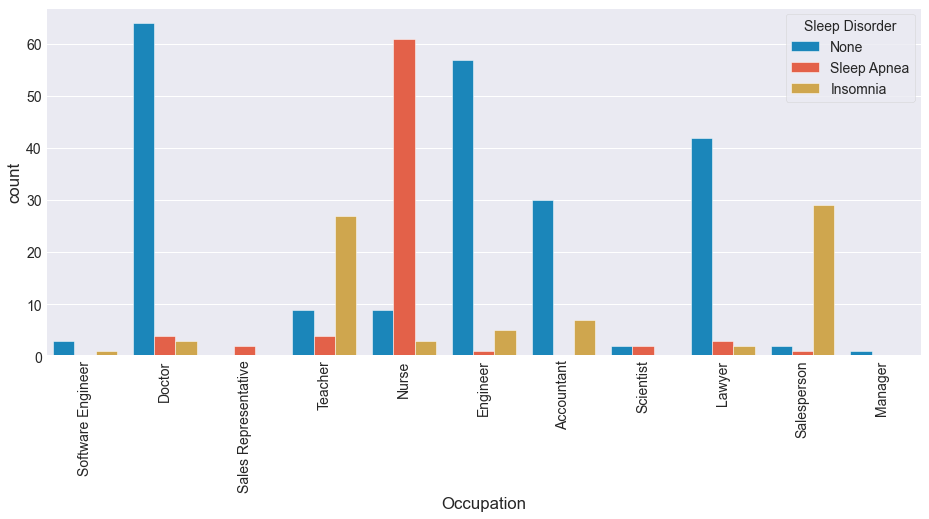

In [31]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x = 'Occupation', data = df, hue = 'Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

From the graph it is clear that the occupation has huge impact on the sleep disorder. Nurses are more subjected to have Sleep Apenea as compared to other occupations and very few of them have no sleep disorder. After nurses, the next most affected occupation is the Salesperson, which counts for the most suffering from Insomia followed by teachers. 

However there are some occupations where most of the people have very few instance of Sleep Apenea and Insomia such as Engineers, Doctors, Accountants, Lawyers. The Software ENgineers and Managers are so less in number so I cannot say much about that, But the occupation Sales Representative has shown only Sleep Apenea and no Insomia or No sleep disorder.

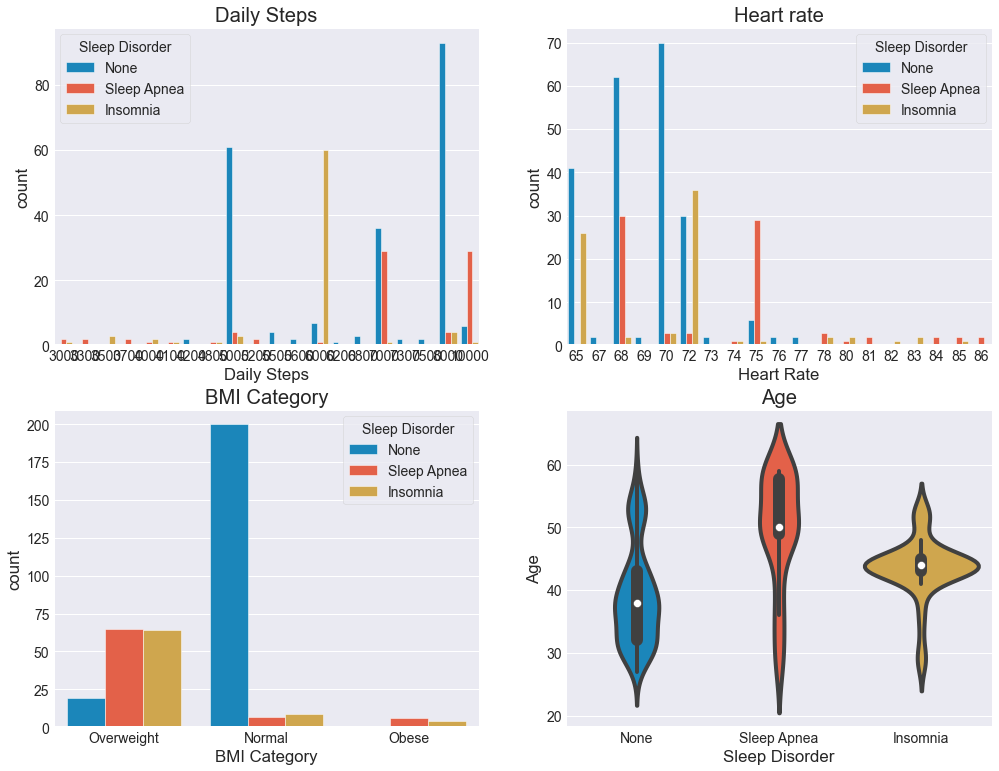

In [32]:
fig, ax = plt.subplots(2,2,figsize=(15,12))

sns.countplot(x = 'Daily Steps', data = df, ax=ax[0,0],hue = 'Sleep Disorder').set_title('Daily Steps')
sns.countplot(x = 'Heart Rate', data = df, ax=ax[0,1],hue = 'Sleep Disorder').set_title('Heart rate')
sns.countplot(x = 'BMI Category', data = df, ax=ax[1,0],hue = 'Sleep Disorder').set_title('BMI Category')
sns.violinplot(x = 'Sleep Disorder', y = 'Age' ,data = df, ax=ax[1,1]).set_title('Age')

plt.show()

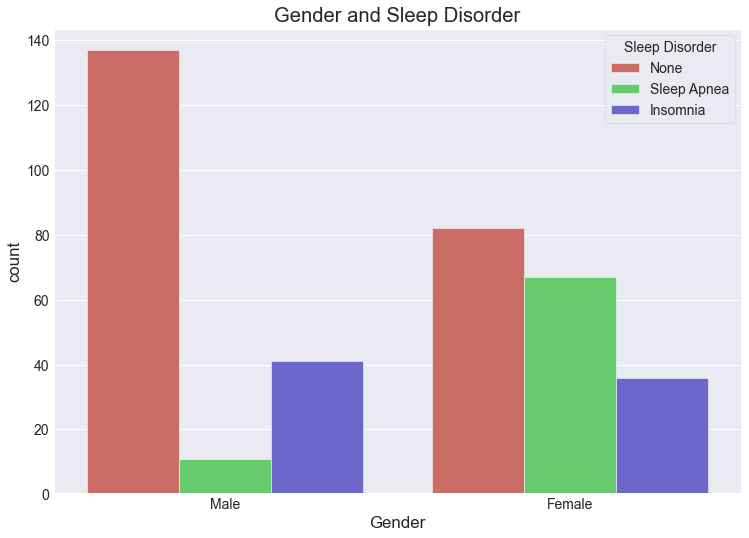

In [37]:
#Gender count plot
plt.figure(figsize=(11,8))
sns.countplot(x = 'Gender', data = df, palette = 'hls', hue = 'Sleep Disorder').set_title('Gender and Sleep Disorder')
plt.show()

Most of the males and females are not suffering from any sleep disorder. However females tend to have more sleep disorder as compared to males. The number of females suffering from Sleep Apnea is quite high as compared to males. But in contrast to that, greater number of males are suffering from Insomia as compared to females.

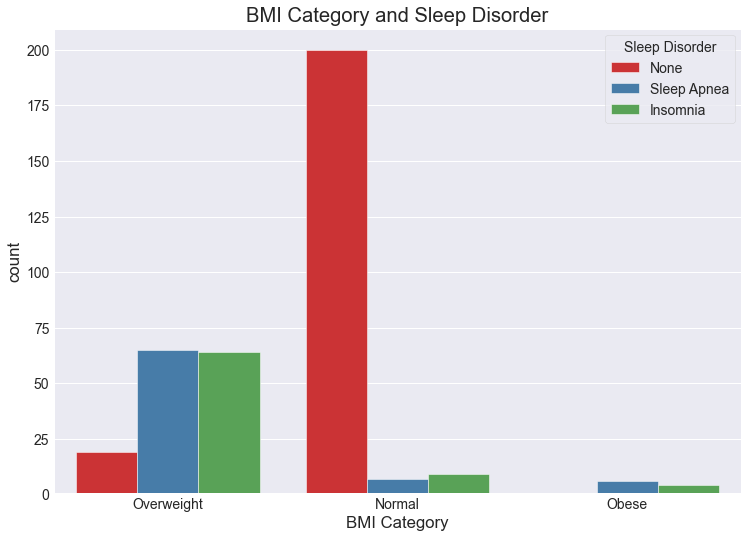

In [36]:
plt.figure(figsize=(11,8))
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', data = df, palette = 'Set1').set_title('BMI Category and Sleep Disorder')
plt.show()

People with normal BMI are less likely to suffer from any sleep disorder. However, this is opposite in case of Overweight and Obese people. Overweight are more likely to suffer more from sleep disordera than Obese people.

In [39]:
pd.crosstab(df['Stress Level'],df['Sleep Disorder'], margins=True).T.style.background_gradient(cmap='summer_r')

Stress Level,3,4,5,6,7,8,All
Sleep Disorder,,,,,,,
Insomnia,1,24,6,2,41,3,77
None,40,43,57,43,3,33,219
Sleep Apnea,30,3,4,1,6,34,78
All,71,70,67,46,50,70,374


### 3. Multivariate Analysis

- **Multivariate Analysis** : data involves **multiple different variables**.

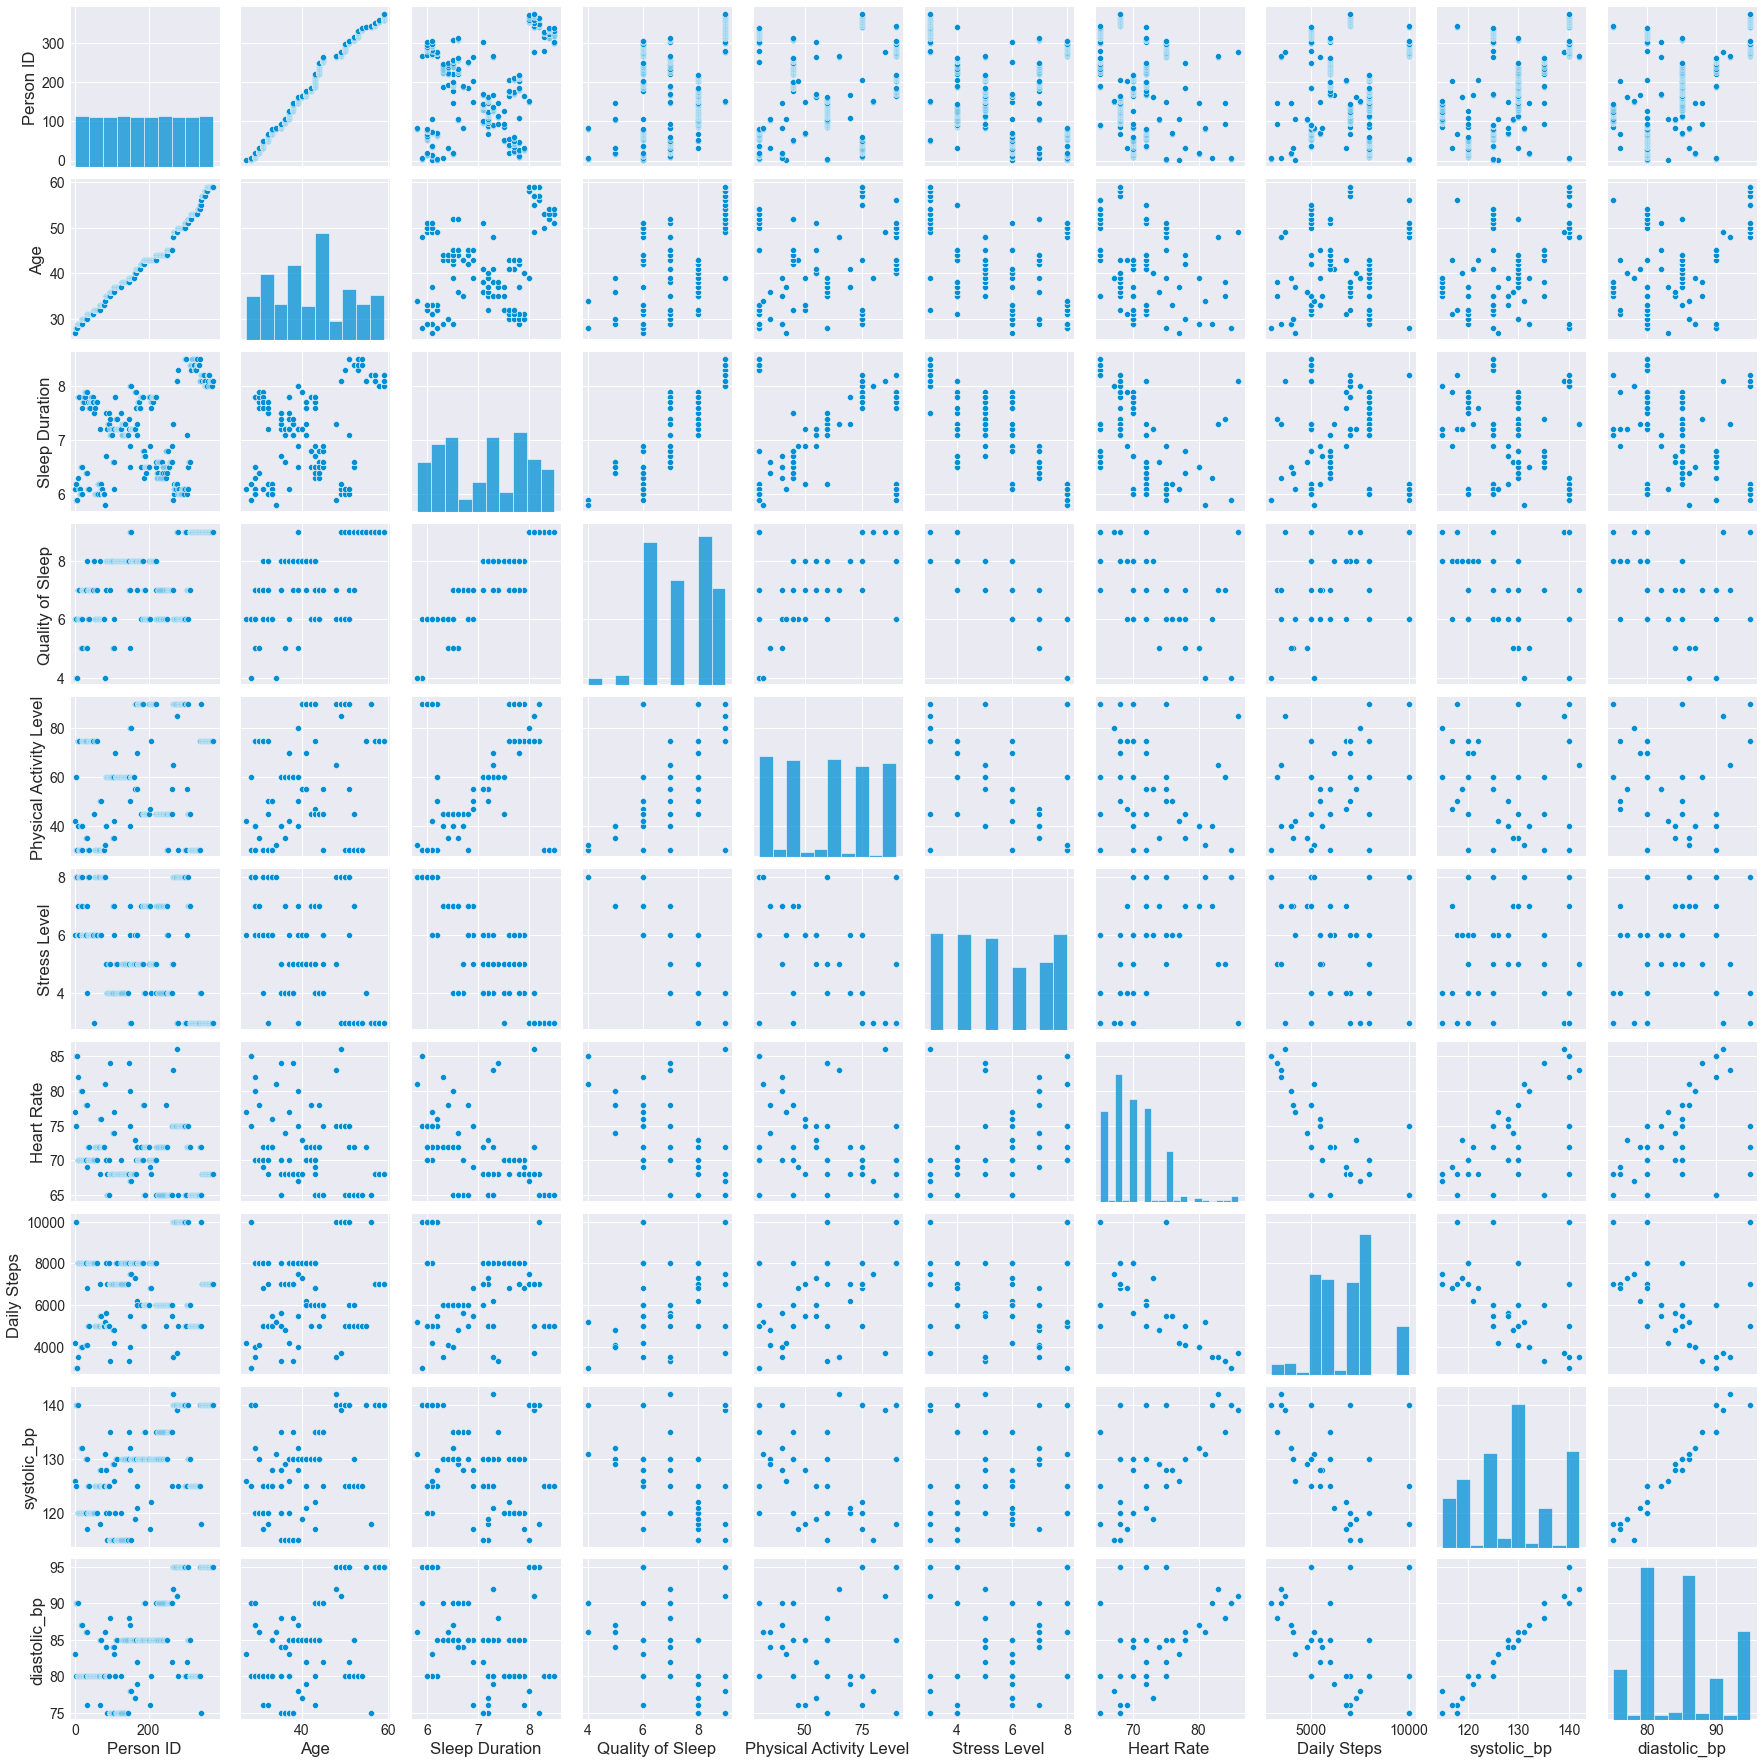

In [33]:
sns.pairplot(df)
plt.show()

<h2 style="color:blue" align="left"> 6. Feature Engineering </h2>

In [46]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'systolic_bp', 'diastolic_bp'],
      dtype='object')

##### Label Encoding for categorical variables

In [47]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [48]:
vars = ['Gender', 'Occupation','BMI Category','Sleep Disorder']
for i in vars:
    label_encoder.fit(df[i].unique())
    df[i] = label_encoder.transform(df[i])
    print(i,':' ,df[i].unique())

Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [2 0 1]
Sleep Disorder : [1 2 0]


##### Explore the Correlation between numerical features

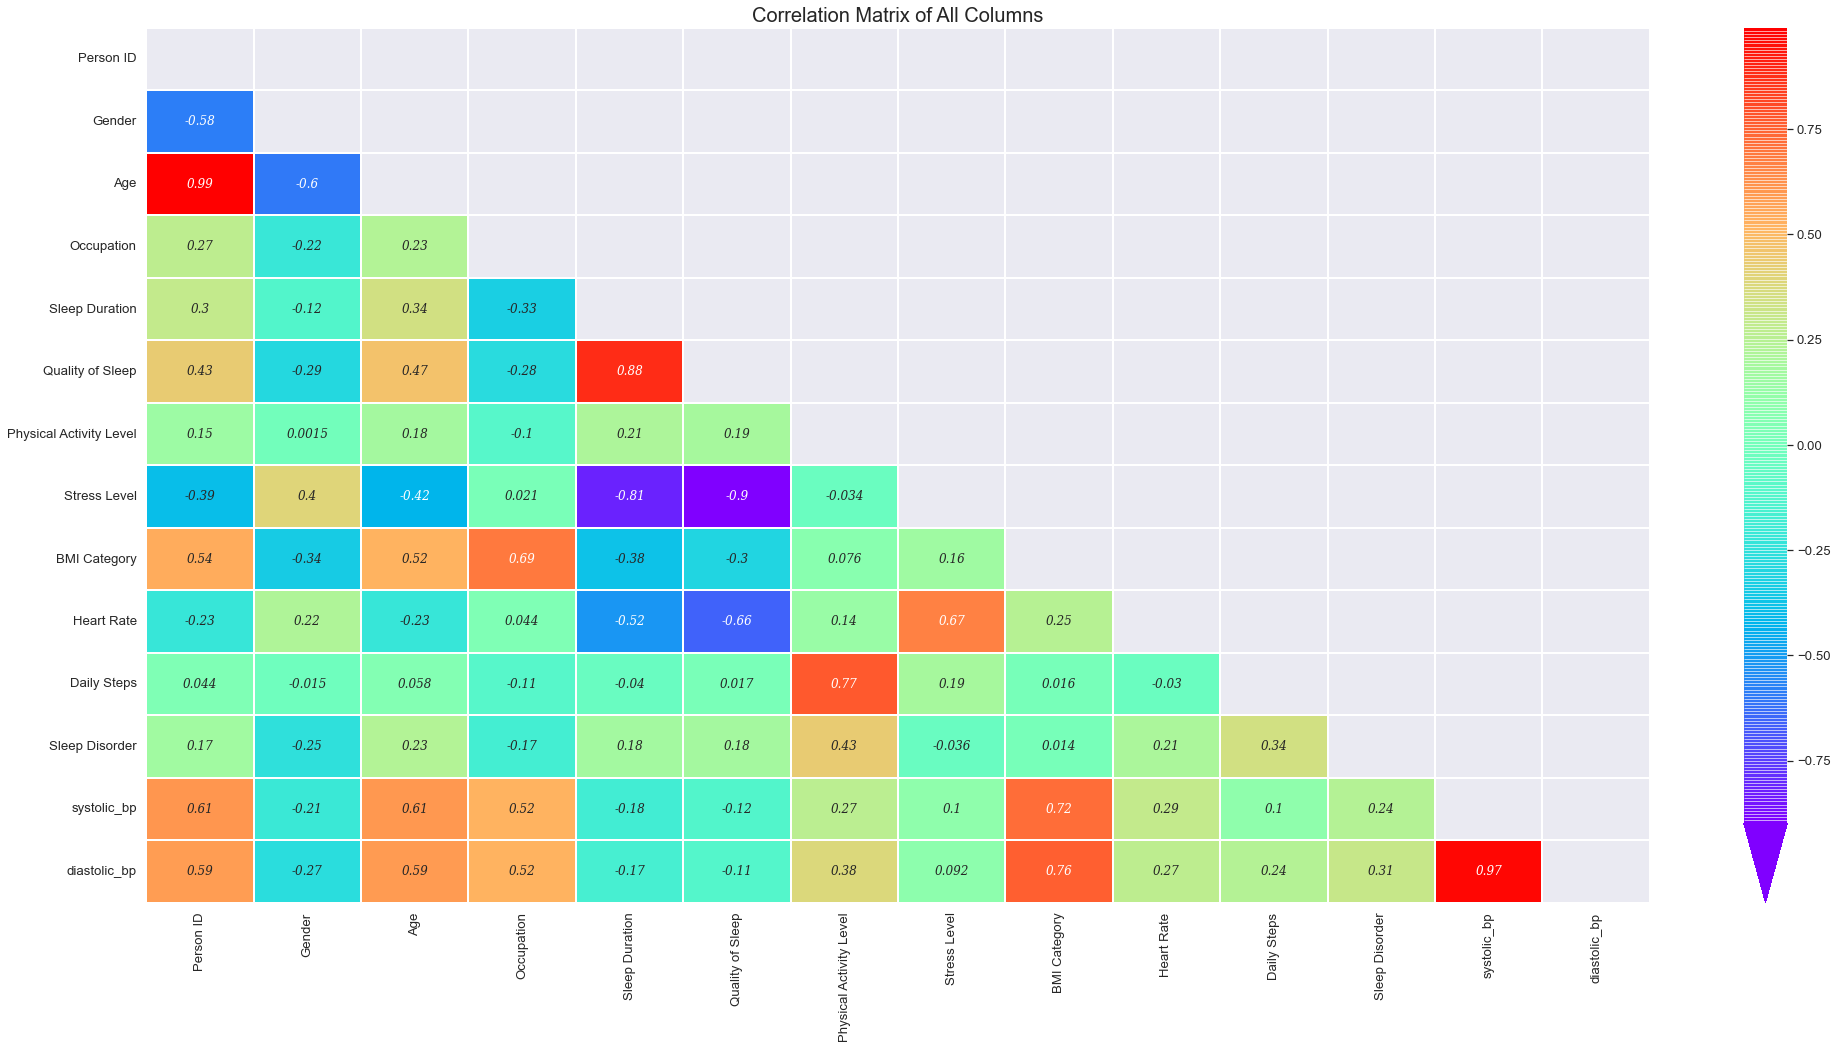

In [49]:
# Define the figure size
plt.figure(figsize = (30,15))

# Cutomize the annot
annot_kws={'fontsize':12,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, 
                 cmap = 'rainbow', annot = True, linewidth = 1.5,
                 annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix of All Columns', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

In [50]:
X = df.drop('Sleep Disorder',axis=1)
y = df['Sleep Disorder']

In [51]:
X.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,systolic_bp,diastolic_bp
0,1,1,27,9,6.1,6,42,6,2,77,4200,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,125,80
3,4,1,28,6,5.9,4,30,8,1,85,3000,140,90
4,5,1,28,6,5.9,4,30,8,1,85,3000,140,90


In [52]:
y.head()

0    1
1    1
2    1
3    2
4    2
Name: Sleep Disorder, dtype: int32

#### Splitting dataset into X_train, X_test, y_train, y_test

In [53]:
from sklearn.model_selection import train_test_split #importing train_test_split
#spliting into X_train,X_test,y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [54]:
#Training Data
print("X_train", X_train.shape)
print("y_train", y_train.shape)

#Testing Data
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (261, 13)
y_train (261,)
X_test (113, 13)
y_test (113,)


<h2 style="color:blue" align="left"> 7. Building the Model </h2>

## Model Building

I will be using the following models to predict the product delivery:

- Random Forest Classifier
- Decision Tree Classifier

##### Random Forest Classifier 

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier()

In [57]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Parameter grid
param_grid = {
    'max_depth': [4,8,12],
    'min_samples_leaf': [2,4,6],
    'min_samples_split': [2,4,6],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#GridSearchCV object
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [58]:
#Random Forest Classifier Object
rfc = RandomForestClassifier(criterion='gini', max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, random_state=0)

In [59]:
#Training accuracy
print('Training accuracy: ', rfc.score(X_train, y_train))

Training accuracy:  0.9272030651340997


In [60]:
#Testing accuracy
print('Testing accuracy: ', rfc.score(X_test, y_test))

Testing accuracy:  0.8938053097345132


In [61]:
#predicting the test set results
rfc_pred = rfc.predict(X_test)

##### Decision Tree Classifier 

In [62]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtc = DecisionTreeClassifier()

In [63]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#Parameter grid
param_grid = {
    'max_depth': [2,4,6],
    'min_samples_leaf': [2,4,6],
    'min_samples_split': [2,4,6],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]}

#GridSearchCV object
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 0}


In [64]:
#Decision Tree Classifier Object
dtc = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=6, min_samples_split=2, random_state=0, class_weight='balanced')

#Fitting the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=6,
                       random_state=0)

In [65]:
#Training accuracy
print('Training accuracy: ', dtc.score(X_train, y_train))

Training accuracy:  0.8735632183908046


In [66]:
#Testing accuracy
print('Testing accuracy: ', dtc.score(X_test, y_test))

Testing accuracy:  0.8849557522123894


In [67]:
#predicting the test set results
dtc_pred = dtc.predict(X_test)

<h2 style="color:blue" align="left"> 8. Model Evaluation </h2>

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error

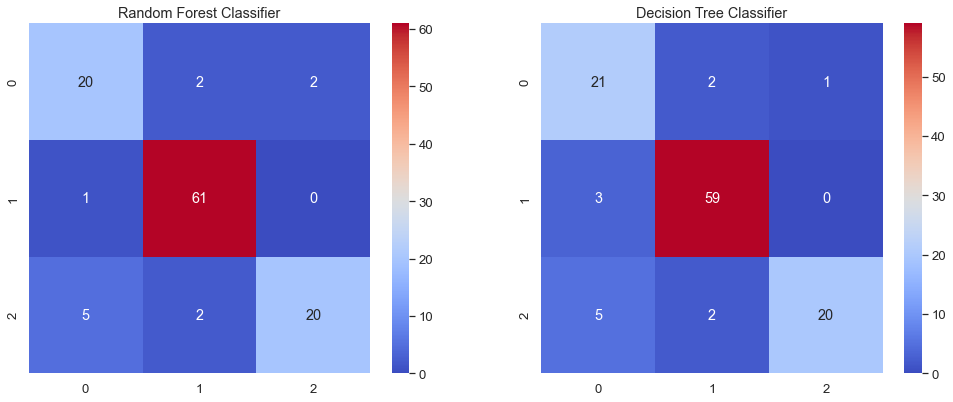

In [73]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='coolwarm', ax=ax[0]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, cmap='coolwarm', ax=ax[1]).set_title('Decision Tree Classifier')
plt.show()

In [74]:
#classification report
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_pred))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.94      0.98      0.96        62
           2       0.91      0.74      0.82        27

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.72      0.88      0.79        24
           1       0.94      0.95      0.94        62
           2       0.95      0.74      0.83        27

    accuracy                           0.88       113
   macro avg       0.87      0.86      0.86       113
weighted avg       0.90      0.88      0.89       113



##### Model Comparision

Text(0, 0.5, 'Accuracy')

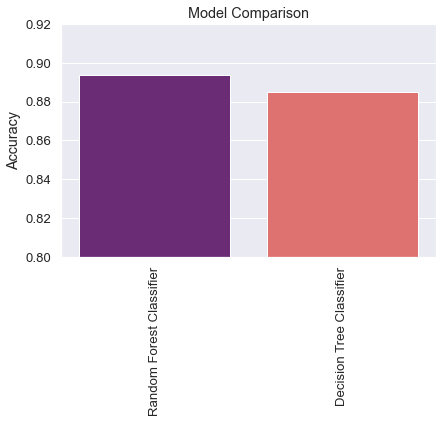

In [80]:
models = ['Random Forest Classifier', 'Decision Tree Classifier',]
accuracy = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred)]
sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')
plt.ylim(0.8,0.92)
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

<h2 style="color:blue" align="left"> 9. Conclusion </h2>

From the exploratory data analysis, I have concluded that the sleep orders depends upon three main factors that are <b>gender, occupation and BMI of the patient</b>. The males have more instance of Insomia whereas femlaes have more instances of Sleep Apnea. In addition the that people with occupation such as nurses are more prone to sleep disorders. The BMI of the patient also plays a vital role in the prediction of sleep disorders. The patients who are either Obese or overweight are more prone to sleep disorders.

Coming to the classfication models, both the models performed pretty good, however the Random Forest Classifier have excellent results with 89% accuracy. Decision Tree has 87% accuracy.